<a href="https://www.kaggle.com/code/iamarunkumar/3b-multiple-linear-regression?scriptVersionId=178324108" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Multiple linear regression model

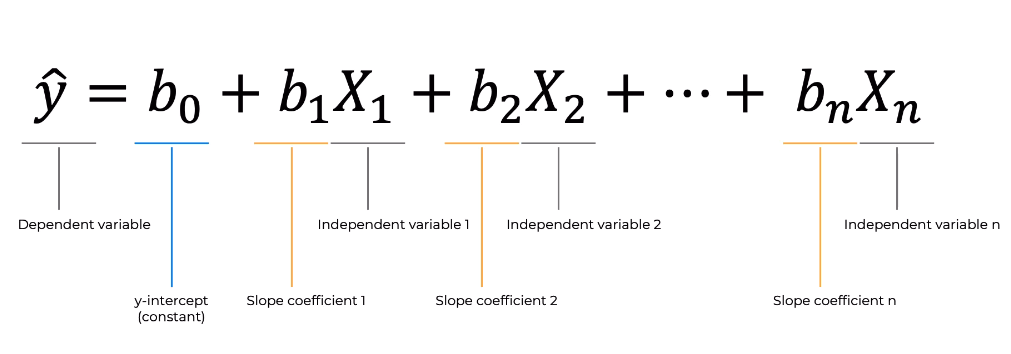

In multiple LR, we will have more than one matrix of feature (multiple feature columns) and one dependent variable vector column

# Importing the libraries

In [1]:
# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing the dataset

In [2]:
# Let's import the data set using pandas

df = pd.read_csv('/kaggle/input/startups/50_Startups.csv')
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

# Encoding categorical data

In [3]:
# Let's do one hot encoding for the category (state) column

# Let's import ColumnTransfer class from compose module of sklearn library
# Also,let's import OneHotEncoder class from preprocessing module of sklearn library
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])],remainder='passthrough')
X = np.array(ct.fit_transform(X))


# Splitting the dataset into training set and test set

In [4]:
# Let's split the dataset into training set and test set.
# Let's import the train_test_split function from model_selection module of sklearn library

from sklearn.model_selection import train_test_split

# creating object (X_train, X_test, y_train, y_test) and splitting the training & test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

**Remember, in multiple linear regression we don't need to do feature scaling because the coefficient that is multiplied with each independent variable (each feature) that doesn't matter because some features have higher value than others because coefficient will compensate to put everything on the same scale.**

**Another important information - we don't need to check the assumptions of linear regression for multiple linear regression model. In other words, we don't check the assumptions of multiple linear regression models.** 

Even if our dataset don't have linear relationship, we can still perform multiple linear regression model. But the accuracy will be poorer and hence we will switch to another model.

# Training the multiple linear regression model on the the training set

Firstly, we need to understand that we **don't need to avoid or do something to avoid the dummy variable trap**. Because the multiple linear regression class itself will take care of dummy variable. meaning, it will automatically avoid the trap. We don't need to remove one of the columns of dummy variable (0.0 0.0 1.0)

Secondly, we **don't need to deploy a backward elimination technique in order to select the features with highest p-value and that are the most statistically significant.** Because the multiple linear regression class will automatically take care of identifying the best feature (feature with highest p-value) or the statistically significant to figure out how to predict the dependent variable with the highest accuracy.

Comparing the accuracy of a model with the accuracies of other models are called as **model selection**

In [5]:
# Let's import the Linear Regression class from linear_model module of sklearn library
from sklearn.linear_model import LinearRegression

# Below code will build the multiple linear regression model
regressor = LinearRegression()

# Below code will train the multiple linear regression model
regressor.fit(X_train,y_train)


LinearRegression()

# Predicting the test set results

Here, unlike in simple linear regression we **won't visualize the training set & test set** because in simple LR, we have only one feature & one dep.variable. So, it was possible to showcase the feature in x-axis and dep.varibale in y-axis.
But here in multiple LR, we have 4 features and **we cannot visualize 4 sided axis in graph**.

So, we will **display 2 vectors**. one with the real profit in the test or real value of the dataset and the other vector with the predicted value or predicted vector in the same test set. Finally, we will compare both these to see if the predicted vector is close to real vector (profits).

In [6]:
# Let's display the vector of predictions first.
# y_pred is the predicted profits in the test set.
y_pred = regressor.predict(X_test)

# We now use np.set_printoptions method to just display any numerical with only 2 values after comma.
np.set_printoptions(precision=2)

"""Now, let's display the 2 vectors - predicted profits and real profits together. We use concatenate function of numpy.
Concatenate will concatenate either vertically or hrizontally two vectors or even arrays.

Concatenate will expect the argument of tuple of arrays/vectors that we are concatenating.
Remember the vector of predicted profits (y values in df.iloc[] step) is displayed horizontally. But we need to display
it vertically. To do that we use reshape() attribute function. This method will reshape the vectors/arrays. It expects 
2 arguments. one is the number of elements in y_pred (no.of rows). To get that we use len()function and the second 
argument is just 1 (columns).

In simple terms, the reshape function expects the rows and columns to be reshaped of vectors/arrays. reshape
used to change the dimension of vectors/arrays.

y_test is the real profits in the test set
axis is the second argument of concatenate function. It has either values 0 or 1. 0 means vertical concatenation and 1
means horizontal concatenation."""
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

"""If you see the output after execution, it has 2 columns (vector of predicted profit and real profits). Look at the value
of each value compared to the other column. They will be very close to each other. means, the multiple linear regression
model perfectly accurated the data. higher accuracy is achieved.

Remember it has only 10 rows. because 20% (test_size=0.2) of 50 rows is 10."""

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]
